<a href="https://colab.research.google.com/github/CarlosLeandro09/DataAnalysisRadiology/blob/main/CT_Analisys_DRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORTAREMOS AS BILIOTECAS**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

**2. IMPORTAREMOS TAMBÉM O NOSSO DATASET**
Contém 2060 linhas!

In [ ]:
df = pd.read_csv('database.csv',sep=';',encoding='iso-8859-1')
df.tail()

,"Modality [CS:0008,0060]","Manufacturers Model Name [LO:0008,1090]","Patients Name [PN:0010,0010]","Patient ID [LO:0010,0020]","Patients Sex [CS:0010,0040]","Patients Age [AS:0010,1010]","Patients Size [DS:0010,1020]","Patients Weight [DS:0010,1030]","Contrast/Bolus Agent [LO:0018,0010]","Body Part Examined [CS:0018,0015]","Scan Options [CS:0018,0022]","Slice Thickness [DS:0018,0050]","KVP [DS:0018,0060]","X-Ray Tube Current [IS:0018,1151]","Total Collimation Width [FD:0018,9307]","Table Feed per Rotation [FD:0018,9310]","CTDIvol [FD:0018,9345]","Slice Location [DS:0020,1041]",filesize (kb) [filesize (kb)],hasPixeldata [hasPixeldata],path [path],filename [filename],Unnamed: 22
2056,CT,Brilliance 10,ANONYMOUS,1602651556267,F,062Y,NaN,NaN,NaN,NaN,HELIX,2.0,120,167,NaN,NaN,7.4,137.5,522,True,C:\Users\clean\OneDrive\Área de Trabalho\Image...,img96_anon.dcm,NaN
2057,CT,Brilliance 10,ANONYMOUS,1602651556267,F,062Y,NaN,NaN,NaN,NaN,HELIX,2.0,120,167,NaN,NaN,7.4,138.5,522,True,C:\Users\clean\OneDrive\Área de Trabalho\Image...,img97_anon.dcm,NaN
2058,CT,Brilliance 10,ANONYMOUS,1602651556267,F,062Y,NaN,NaN,NaN,NaN,HELIX,2.0,120,167,NaN,NaN,7.4,139.5,522,True,C:\Users\clean\OneDrive\Área de Trabalho\Image...,img98_anon.dcm,NaN
2059,CT,Brilliance 10,ANONYMOUS,1602651556267,F,062Y,NaN,NaN,NaN,NaN,HELIX,2.0,120,167,NaN,NaN,7.4,140.5,522,True,C:\Users\clean\OneDrive\Área de Trabalho\Image...,img99_anon.dcm,NaN
2060,CT,Brilliance 10,ANONYMOUS,1602651556267,F,062Y,NaN,NaN,NaN,NaN,HELIX,2.0,120,167,NaN,NaN,7.4,50.5,522,True,C:\Users\clean\OneDrive\Área de Trabalho\Image...,img9_anon.dcm,NaN


**3. VAMOS ORGANIZAR NOSSOS DADOS**

In [ ]:
data = df.filter(['Modality [CS:0008,0060]', 'Manufacturers Model Name [LO:0008,1090]',
       'Patients Name [PN:0010,0010]', 'Patient ID [LO:0010,0020]',
       'Patients Sex [CS:0010,0040]', 'Patients Age [AS:0010,1010]',
       'Patients Size [DS:0010,1020]', 'Patients Weight [DS:0010,1030]',
       'Body Part Examined [CS:0018,0015]', 'Scan Options [CS:0018,0022]',
       'Slice Thickness [DS:0018,0050]', 'KVP [DS:0018,0060]',
       'Table Feed per Rotation [FD:0018,9310]',
       'Total Collimation Width [FD:0018,9307]', 'CTDIvol [FD:0018,9345]',
       'X-Ray Tube Current [IS:0018,1151]', 'AcquisitionTime [TM:0008,0032]',
       'Contrast/Bolus Agent [LO:0018,0010]', 'Slice Location [DS:0020,1041]'])

newcolumns = {'Modality [CS:0008,0060]':'Modality', 'Manufacturers Model Name [LO:0008,1090]':'Manufacturer',
       'Patients Name [PN:0010,0010]':'PatientName', 'Patient ID [LO:0010,0020]':'PatientID',
       'Patients Sex [CS:0010,0040]':'Sex', 'Patients Age [AS:0010,1010]':'Age',
       'Patients Size [DS:0010,1020]':'Size', 'Patients Weight [DS:0010,1030]':'Weight',
       'Body Part Examined [CS:0018,0015]':'BodyPart', 'Scan Options [CS:0018,0022]':'ScanMode',
       'Slice Thickness [DS:0018,0050]':'SliceThickness', 'KVP [DS:0018,0060]':'kVp',
       'Table Feed per Rotation [FD:0018,9310]':'TableFeedperRotation',
       'Total Collimation Width [FD:0018,9307]':'Collimation', 'CTDIvol [FD:0018,9345]':'CTDIvol',
       'X-Ray Tube Current [IS:0018,1151]':'mA', 'AcquisitionTime [TM:0008,0032]':'AcquisitionTime',
       'Contrast/Bolus Agent [LO:0018,0010]':'Contrast', 'Slice Location [DS:0020,1041]':'Location'}

dt = data.rename(columns=newcolumns)
dt.head()

,Modality,Manufacturer,PatientName,PatientID,Sex,Age,Size,Weight,BodyPart,ScanMode,SliceThickness,kVp,TableFeedperRotation,Collimation,CTDIvol,mA,Contrast,Location
0,CT,Gemini,ANONYMOUS,1602651663112,F,065Y,NaN,NaN,NaN,HELIX,1.0,120,NaN,NaN,19.4,469,NaN,186.5
1,CT,Gemini,ANONYMOUS,1602651663112,F,065Y,NaN,NaN,NaN,HELIX,1.0,120,NaN,NaN,19.4,469,NaN,185.5
2,CT,Gemini,ANONYMOUS,1602651663112,F,065Y,NaN,NaN,NaN,HELIX,1.0,120,NaN,NaN,19.4,469,NaN,184.5
3,CT,Gemini,ANONYMOUS,1602651663112,F,065Y,NaN,NaN,NaN,HELIX,1.0,120,NaN,NaN,19.4,469,NaN,183.5
4,CT,Gemini,ANONYMOUS,1602651663112,F,065Y,NaN,NaN,NaN,HELIX,1.0,120,NaN,NaN,19.4,469,NaN,182.5


**4. QUEM SÃO MEUS PACIENTES?**

In [ ]:
data1 = dt.drop_duplicates(subset='PatientID',keep='first')
data1

,Modality,Manufacturer,PatientName,PatientID,Sex,Age,Size,Weight,BodyPart,ScanMode,SliceThickness,kVp,TableFeedperRotation,Collimation,CTDIvol,mA,Contrast,Location
0,CT,Gemini,ANONYMOUS,1602651663112,F,065Y,NaN,NaN,NaN,HELIX,1.0,120,NaN,NaN,19.4,469,NaN,186.5
299,CT,Aquilion,ANONYMOUS,1602651190489,F,067Y,NaN,NaN,TCAR,HELICAL_CT,0.5,120,NaN,NaN,16.5,300,NaN,-59.4
755,CT,Aquilion,ANONYMOUS,1602651329556,F,008M,NaN,NaN,TORAX,HELICAL_CT,0.5,120,NaN,NaN,7.4,120,CE,39.6
1056,CT,Aquilion,ANONYMOUS,1602651435376,F,082Y,NaN,NaN,TORAX,HELICAL_CT,0.5,120,NaN,NaN,24.4,164,NaN,79.2
1400,CT,Aquilion,ANONYMOUS,1602651496132,F,067Y,NaN,NaN,TORAX,HELICAL_CT,0.5,120,NaN,NaN,33.4,428,NaN,79.2
1782,CT,Brilliance 10,ANONYMOUS,1602651556267,F,062Y,NaN,NaN,NaN,HELIX,2.0,120,NaN,NaN,7.4,167,NaN,141.5


**5. FEITO ISSO, VAMOS AGORA ANALIZAR ÍNDICES DOSIMÉTRICOS**

In [ ]:
lista_ID = data1.PatientID.values
sub_result = []
for ID in lista_ID:
  filtro = dt[(dt.PatientID == ID)]
  nome= filtro.iloc[0]["PatientID"]
  sexo = filtro.iloc[0]["Sex"]
  if(sexo =='F'):
    sexo = 0
  else:
    sexo = 1
  peso = filtro.iloc[0]["Weight"]
  altura = filtro.iloc[0]["Size"]
  idade = filtro.iloc[0]["Age"]
  age = int(idade[1:3])
  partecorpo = filtro.iloc[0]["BodyPart"]
  modelo = filtro.iloc[0]["Manufacturer"]
  modo = filtro.iloc[0]["ScanMode"]
  kvp = filtro.iloc[0]["kVp"]
  CTDI = filtro.CTDIvol.max()
  slice_begin = filtro.Location.min()
  mode_slice_begin = abs(slice_begin)
  slice_end = filtro.Location.max()
  mode_slice_end = abs(slice_end)
  scanlength = (mode_slice_begin+mode_slice_end)/10
  DLP = CTDI*scanlength 
  subresult = pd.DataFrame({"ID":[nome],"Sexo":[sexo],"Peso":[peso],"Altura":[altura],"Idade":[age],"Anatomia":[partecorpo],"Modelo":[modelo],"Modo":[modo],"kVp":[kvp],"Scanlength":[scanlength],"CTDI":[CTDI],"DLP":[DLP]})
  sub_result.append(subresult)

result = pd.concat(sub_result)
result

,ID,Sexo,Peso,Altura,Idade,Anatomia,Modelo,Modo,kVp,Scanlength,CTDI,DLP
0,1602651663112,0,NaN,NaN,65,NaN,Gemini,HELIX,120,29.80,19.4,578.120
0,1602651190489,0,NaN,NaN,67,TCAR,Aquilion,HELICAL_CT,120,27.30,16.5,450.450
0,1602651329556,0,NaN,NaN,8,TORAX,Aquilion,HELICAL_CT,120,12.00,7.4,88.800
0,1602651435376,0,NaN,NaN,82,TORAX,Aquilion,HELICAL_CT,120,27.44,24.4,669.536
0,1602651496132,0,NaN,NaN,67,TORAX,Aquilion,HELICAL_CT,120,30.48,33.4,1018.032
0,1602651556267,0,NaN,NaN,62,NaN,Brilliance 10,HELIX,120,36.30,7.4,268.620


**6. QUE TAL ANALIZARMOS A CORRELAÇÃO ENTRE NOSSAS TAGS?**

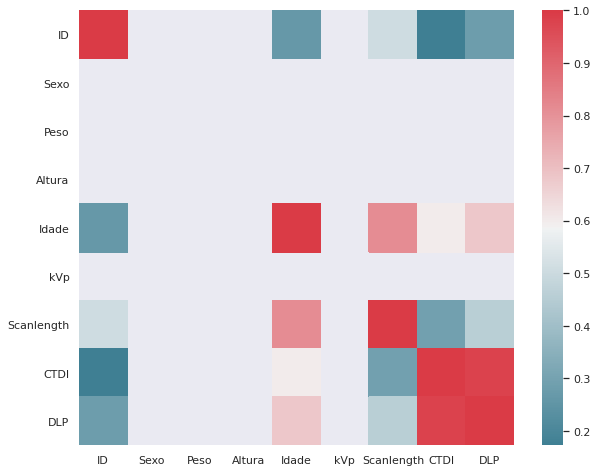

In [ ]:
plt.subplots(figsize=(10, 8))
corr = result.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)
plt.show()

**9. VAMOS PLOTAR IDADE X DLP**

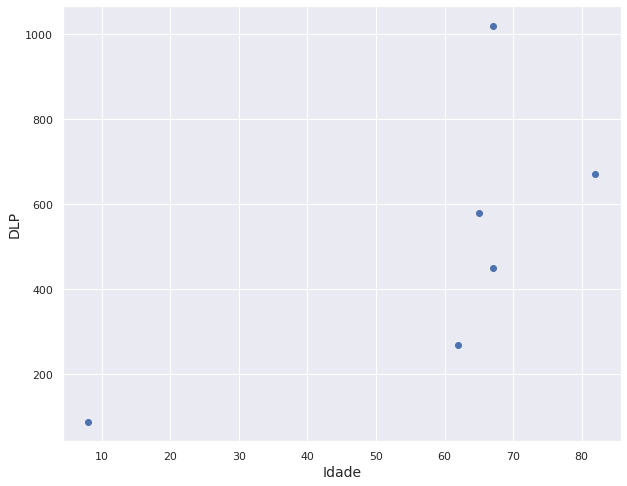

In [ ]:
plt.subplots(figsize=(10, 8))
plt.scatter(result.Idade,result.DLP)
plt.xlabel('Idade',size=14)
plt.ylabel('DLP',size=14)
plt.grid(True)
plt.show()

**9. VAMOS PLOTAR IDADE X COMPRIMENTO DE SCAN**

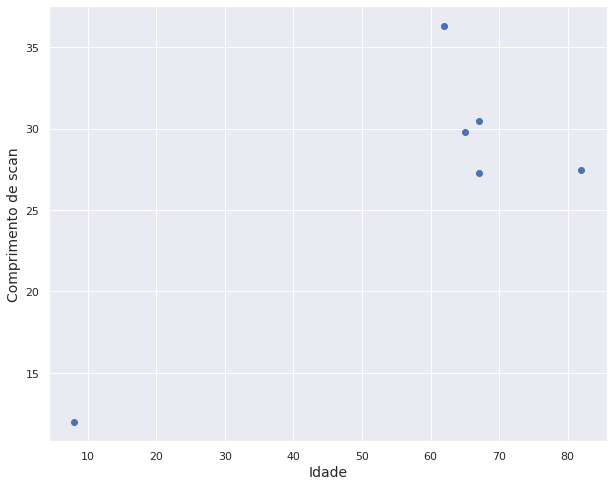

In [ ]:
plt.subplots(figsize=(10, 8))
plt.scatter(result.Idade,result.Scanlength)
plt.xlabel('Idade',size=14)
plt.ylabel('Comprimento de scan',size=14)
plt.grid(True)
plt.show()

**10. VAMOS SEGMENTAR DADOS PADRONIZADOS**

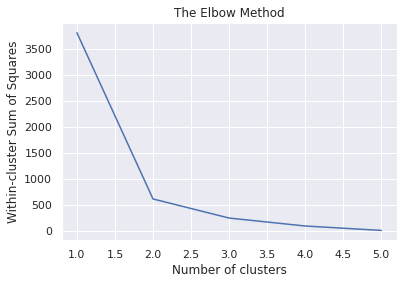

In [73]:
#NÚMERO DE GRUPOS
x = result.filter(['Idade','CTDI'])
wcss = []
cl_num = 6
number_clusters = range(1,cl_num)

for i in number_clusters:
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

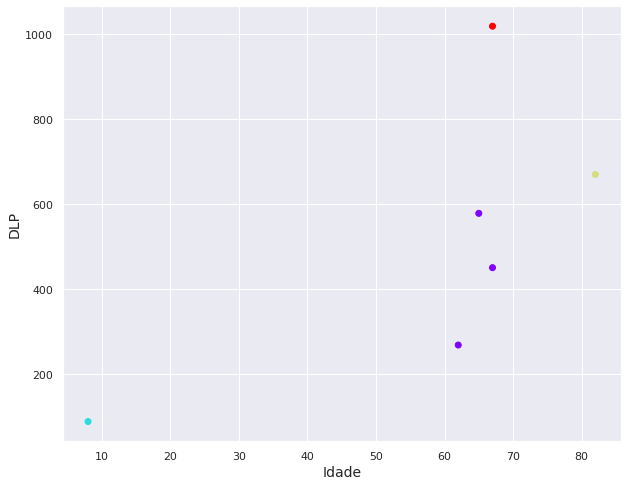

In [72]:
#CLUSTERING
kmeans = KMeans(4)
kmeans.fit(x)
grupos = kmeans.fit_predict(x)
data_grupos = result.copy()
data_grupos['Cluster'] = grupos

plt.subplots(figsize=(10, 8))
plt.scatter(data_grupos.Idade,data_grupos.DLP,c=data_grupos['Cluster'], cmap = 'rainbow')
plt.xlabel('Idade',size=14)
plt.ylabel('DLP',size=14)
plt.grid(True)
plt.show()


In [74]:
data_grupos

,ID,Sexo,Peso,Altura,Idade,Anatomia,Modelo,Modo,kVp,Scanlength,CTDI,DLP,Cluster
0,1602651663112,0,NaN,NaN,65,NaN,Gemini,HELIX,120,29.80,19.4,578.120,0
0,1602651190489,0,NaN,NaN,67,TCAR,Aquilion,HELICAL_CT,120,27.30,16.5,450.450,0
0,1602651329556,0,NaN,NaN,8,TORAX,Aquilion,HELICAL_CT,120,12.00,7.4,88.800,1
0,1602651435376,0,NaN,NaN,82,TORAX,Aquilion,HELICAL_CT,120,27.44,24.4,669.536,2
0,1602651496132,0,NaN,NaN,67,TORAX,Aquilion,HELICAL_CT,120,30.48,33.4,1018.032,3
0,1602651556267,0,NaN,NaN,62,NaN,Brilliance 10,HELIX,120,36.30,7.4,268.620,0


**11. VAMOS TENTAR ESTABELECER UMA DRL?**

In [81]:
conj0 = data_grupos[(data_grupos.Cluster==0)]
drl = conj0.DLP
drl.describe()

count      3.000000
mean     432.396667
std      155.537792
min      268.620000
25%      359.535000
50%      450.450000
75%      514.285000
max      578.120000
Name: DLP, dtype: float64

514.285 representa o terceiro quartil, logo, segundo RSNA/AAPM é a faixa indicada para estabelecimento da nossa DRL para os parâmetros estabelecidos.